In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [194]:
#read csv file of heart dataset in jupyter notebook
heart = pd.read_csv('heart.csv')

In [195]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [196]:
#rename the columns in the dataset

heart.rename(columns= {'age': 'Age', 'sex':'Sex', 'cp': 'chest_pain_type','trestbps':'resting_blood_pressure',
                      'chol': 'serum_cholesterol', 'fbs': 'fasting_blood_sugar', 'restecg': 'Resting_electrocardiograph',
                      'thalach': 'Max_heart_rate', 'exang': 'excercise_induced_angina', 'oldpeak':'ST_depression',
                      'slope': 'Slope_of_peakexercise', 'ca': 'Num_of_major_vessels', 'thal': 'Type_of_thalassemia', 'target': 'Target'}, inplace = True)

In [197]:
heart.head()

,Age,Sex,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,Resting_electrocardiograph,Max_heart_rate,excercise_induced_angina,ST_depression,Slope_of_peakexercise,Num_of_major_vessels,Type_of_thalassemia,Target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [198]:
#information of heart dataset. This shows the dataset has 14 columns. 
#There is no null values so no need of cleaning of data. It is already cleaned. There is total 303 rows.
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
Age                           303 non-null int64
Sex                           303 non-null int64
chest_pain_type               303 non-null int64
resting_blood_pressure        303 non-null int64
serum_cholesterol             303 non-null int64
fasting_blood_sugar           303 non-null int64
Resting_electrocardiograph    303 non-null int64
Max_heart_rate                303 non-null int64
excercise_induced_angina      303 non-null int64
ST_depression                 303 non-null float64
Slope_of_peakexercise         303 non-null int64
Num_of_major_vessels          303 non-null int64
Type_of_thalassemia           303 non-null int64
Target                        303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000015E1B011710>,
      dtype=object)

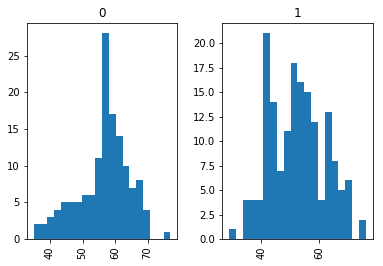

In [199]:
# plot histogram for age column, by as Target. The result shows that maximum number of heart disease is with the age around 45 while
# while maximum number of person not suffering from heart disease is in the age around 55 to 60.
# For the age group of around 55 to 60 the trend is mixed i.e. there are maximum number of person in this age group which do not 
#suffer from heart disease and there is also good number of person in this age group which suffers heart disease.

heart.hist('Age', by = 'Target', bins = 20)

In [200]:
heart['Sex'].replace({1: 'Male', 0: 'Female'}, inplace = True)
heart.head()

,Age,Sex,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,Resting_electrocardiograph,Max_heart_rate,excercise_induced_angina,ST_depression,Slope_of_peakexercise,Num_of_major_vessels,Type_of_thalassemia,Target
0,63,Male,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,Male,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,Female,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,Male,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,Female,0,120,354,0,1,163,1,0.6,2,0,2,1


In [201]:
heart['Sex'].value_counts()

Male      207
Female     96
Name: Sex, dtype: int64

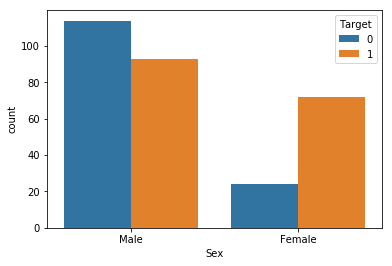

In [202]:
# countplot shows that there are more number of females than males which suffers from heart disease.
# It also shows that there are more number of females than males which do not suffer from heart disease.
#However the fact is that in the dataset there is higher percentage of females than males.
# ALso if you notice in 207 of females there is higher number of females which do not suffer from heart disease
#While in case of 96 males there is large number of males which suffer from heart disease.
# So we can say that it is higher percentage of males than females which suffers from heart disease.
sns.countplot('Sex', data = heart, hue = 'Target')

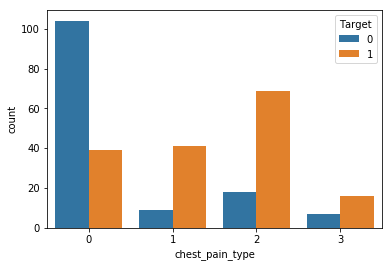

In [203]:
#In chest pain type 0 i.e. typical angina case there is large number of patient whihc do not suffer from heart disease
# In chest pain type 1 i.e. atypical angina and 2 i.e. non-anginal pain there is large number of pateints whihc suffers from heart disease
# In chest pain type 3 i.e. asymptomatic there is significant amount of pateint that suffer from heart disease
#Also it is to be noted that there is large number of patient present in type 0 of chest pain
# while the percentage of pateint with type 3 is very less and for 1 and 2 it is less than 0 type but still it is comparable with each other.
sns.countplot('chest_pain_type', data = heart, hue = 'Target')

In [204]:
heart['chest_pain_type'].value_counts()

0    143
2     87
1     50
3     23
Name: chest_pain_type, dtype: int64

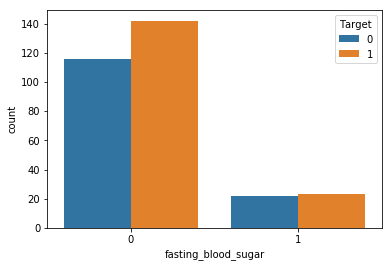

In [205]:
# The result shows that there are more number of pateints with heart disease which do not have blood sugar.
#Thus there is no significant relation between blood sugar and heart disease. However, it is a bit weird case because as per the research articles published
# diabetes or blood sugar plays key role in heart diseases.
sns.countplot(x = 'fasting_blood_sugar', data = heart, hue = 'Target')

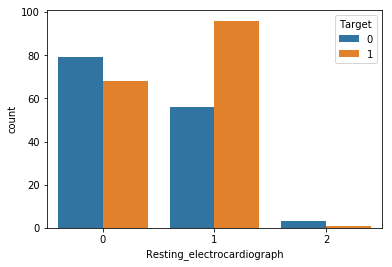

In [206]:
#The result shows that rest ec value of 1 has maximum number of heart patients.
# Value 0 also have significant number of patients with and without heart disease.
sns.countplot(x = 'Resting_electrocardiograph', data = heart, hue = 'Target')

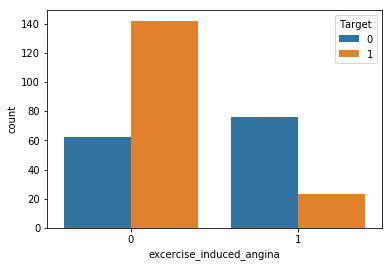

In [207]:
# the result shows that there are more number of patients with heart disease who do not exercise or there is no exercise induced angina
# There is less number of patients with heart disease caused by exercise induced angina
sns.countplot(x = 'excercise_induced_angina', data = heart, hue = 'Target')

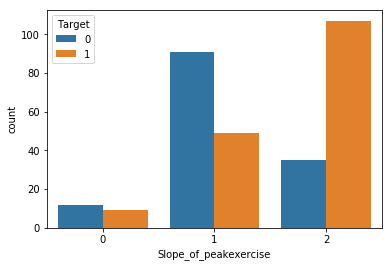

In [208]:
# the result shows that pateint exercising on downsloping i.e. 2 leads to higher risk of heart disease which is again a weird case.
sns.countplot(x = 'Slope_of_peakexercise', data = heart, hue = 'Target')

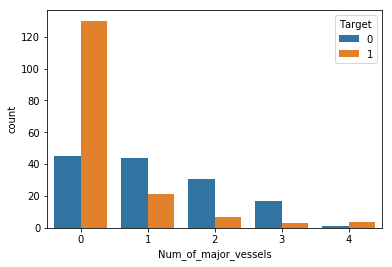

In [209]:
#there are large number of patient who has heart disease due to less number of vessel i.e. 0. This is fine because more the number of major vessels meaning the vessel are open so blood flow will be normal and hence less number of heart disease.
sns.countplot(x = 'Num_of_major_vessels', data = heart, hue = 'Target')

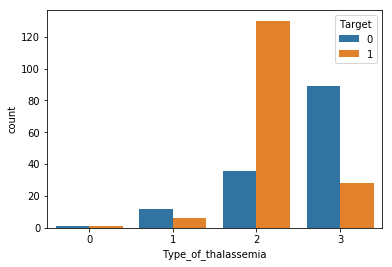

In [210]:
# large number of heart disease due to thalassemia fixed defect.
sns.countplot(x = 'Type_of_thalassemia', data = heart, hue = 'Target')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


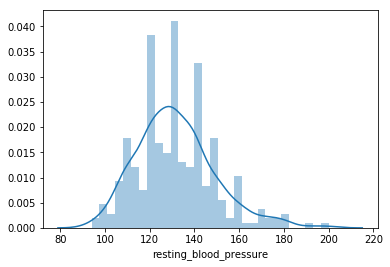

In [211]:
# This is just to see if the data is normally distributed. Like for resting_blood_pressure, it is normally distributed
sns.distplot(heart['resting_blood_pressure'], bins = 30, kde= True)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


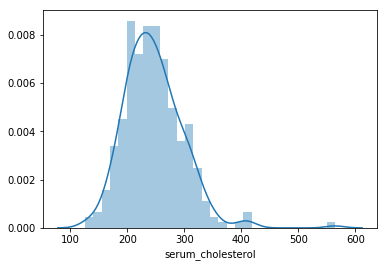

In [212]:
sns.distplot(heart['serum_cholesterol'], bins = 30, kde= True)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


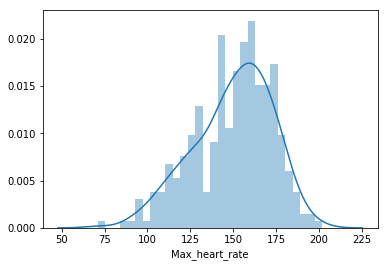

In [213]:
# the peak is more towards right and the curve is left skewed meaning the mean will be more towards left of the peak.
sns.distplot(heart['Max_heart_rate'], bins = 30, kde= True)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


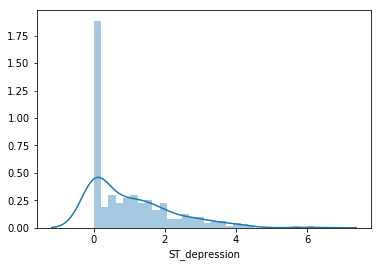

In [214]:
#the peak is more towards left and the curve is right skewed as tail is towards right meaning the mean will be more towards right of the peak.

sns.distplot(heart['ST_depression'], bins = 30, kde= True)

In [215]:
heart['Sex'].replace({'Male': 1, 'Female': 0 }, inplace = True)
heart.head()

,Age,Sex,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,Resting_electrocardiograph,Max_heart_rate,excercise_induced_angina,ST_depression,Slope_of_peakexercise,Num_of_major_vessels,Type_of_thalassemia,Target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


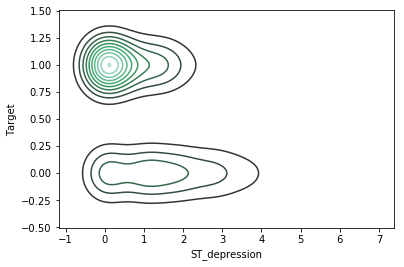

In [216]:
# this also shows that more density of patient suffers from heart disease if they have  ST depression induced by exercise relative to rest.
sns.kdeplot(heart.ST_depression, heart.Target)

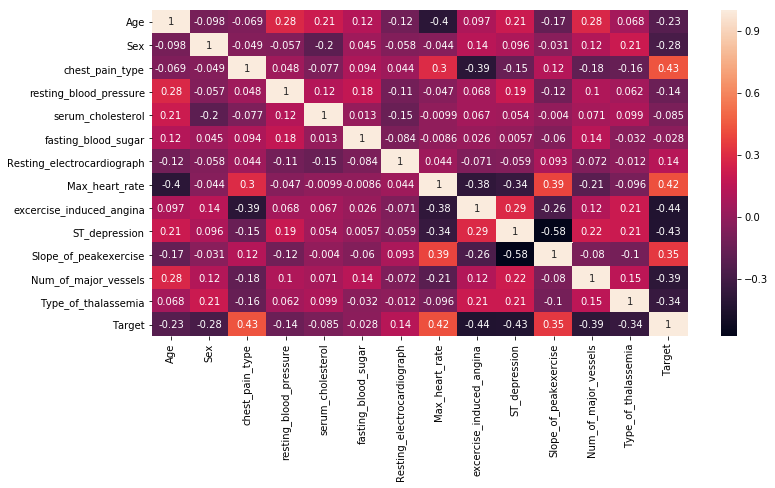

In [217]:
# result shows that there is some correlation between chest pain type, slope of peake exercise and Max heart rate with the Target.
# some correlation is between resting ecg and sex with the Target.
heart_corr = heart.corr()
plt.subplots(figsize = (12,6))
sns.heatmap(heart_corr, annot = True)

In [218]:
X = heart.drop('Target', axis = 1)
y = heart['Target']

In [219]:
from sklearn.model_selection import train_test_split

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 30)

In [221]:
from sklearn.linear_model import LogisticRegression

In [222]:
heart_LR = LogisticRegression()

In [223]:
heart_LR.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [224]:
predictions_LR = heart_LR.predict(X_test)

In [225]:
from sklearn.metrics import confusion_matrix, classification_report

In [226]:
# Logistic Regression is showing precision of 81% for Target 0 and 89% for Target 1.
#F1-score is also around 0.85 which is satisfactory. However, since it is a matter of heart problem higher precision is required.
#Thus we will now use Decision Tree and Random Forest algorithm
print(classification_report(y_test,predictions_LR))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        54
           1       0.89      0.84      0.86        68

   micro avg       0.85      0.85      0.85       122
   macro avg       0.85      0.85      0.85       122
weighted avg       0.86      0.85      0.85       122



In [227]:
# the classifier has made total 38+61+11+12 = 122 predictions i.e. 122 patients were tested for the presence of disease.
# out of 122 patients, the classifier predicted 11+61 = 72 patients with disease and 38+12 = 50 patients without the heart disease.
# However in reality, out of 122 73 patients have heart disease and 49 patients do not.
print(confusion_matrix(y_test,predictions_LR))

[[47  7]
 [11 57]]


In [228]:
from sklearn.tree import DecisionTreeClassifier

In [229]:
heart_DT = DecisionTreeClassifier()

In [230]:
heart_DT.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [231]:
prediction_DT = heart_DT.predict(X_test)

In [232]:
# the precision is decreased.
print(classification_report(y_test, prediction_DT))

              precision    recall  f1-score   support

           0       0.59      0.70      0.64        54
           1       0.72      0.62      0.67        68

   micro avg       0.66      0.66      0.66       122
   macro avg       0.66      0.66      0.66       122
weighted avg       0.67      0.66      0.66       122



In [233]:
from sklearn.ensemble import RandomForestClassifier

In [234]:
heart_RFC = RandomForestClassifier(n_estimators=200)

In [235]:
heart_RFC.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [236]:
predictions_RFC = heart_RFC.predict(X_test)

In [237]:
#The result is almost similar to Logistic regression.
print(classification_report(y_test, predictions_RFC))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81        54
           1       0.87      0.79      0.83        68

   micro avg       0.82      0.82      0.82       122
   macro avg       0.82      0.82      0.82       122
weighted avg       0.82      0.82      0.82       122



In [238]:
import tensorflow as tf

In [239]:
heart.columns

Index(['Age', 'Sex', 'chest_pain_type', 'resting_blood_pressure',
       'serum_cholesterol', 'fasting_blood_sugar',
       'Resting_electrocardiograph', 'Max_heart_rate',
       'excercise_induced_angina', 'ST_depression', 'Slope_of_peakexercise',
       'Num_of_major_vessels', 'Type_of_thalassemia', 'Target'],
      dtype='object')

In [240]:
heart_age = tf.feature_column.numeric_column("Age")
heart_sex = tf.feature_column.numeric_column('Sex')
heart_cpt = tf.feature_column.numeric_column('chest_pain_type')
heart_rbp =tf.feature_column.numeric_column('resting_blood_pressure')
heart_sc = tf.feature_column.numeric_column('serum_cholesterol')
heart_fbs = tf.feature_column.numeric_column('fasting_blood_sugar')
heart_recg = tf.feature_column.numeric_column('Resting_electrocardiograph')
heart_mhr = tf.feature_column.numeric_column('Max_heart_rate')
heart_eia = tf.feature_column.numeric_column('excercise_induced_angina')
heart_oldpeak = tf.feature_column.numeric_column('ST_depression')
heart_spe = tf.feature_column.numeric_column('Slope_of_peakexercise')
heart_mv = tf.feature_column.numeric_column('Num_of_major_vessels')
heart_TD = tf.feature_column.numeric_column('Type_of_thalassemia')

In [241]:
heart_cols = [heart_age, heart_sex, heart_cpt, heart_rbp, heart_sc, heart_fbs, heart_recg, heart_mhr, heart_eia, heart_oldpeak,
             heart_spe, heart_mv, heart_TD]

In [242]:
heart_classifier = tf.estimator.DNNClassifier( hidden_units= [10,10,10], n_classes = 2, feature_columns= heart_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\divya\\AppData\\Local\\Temp\\tmpnjugg5va', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000015E1D148780>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [243]:
input_func = tf.estimator.inputs.pandas_input_fn(x = X_train, y = y_train, batch_size = 20, shuffle = True)

In [244]:
heart_classifier.train(input_func, steps = 200)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\divya\AppData\Local\Temp\tmpnjugg5va\model.ckpt.
INFO:tensorflow:loss = 897.77313, step = 1
INFO:tensorflow:Saving checkpoints for 10 into C:\Users\divya\AppData\Local\Temp\tmpnjugg5va\model.ckpt.
INFO:tensorflow:Loss for final step: 0.0076716742.


In [245]:
pred_fn = tf.estimator.inputs.pandas_input_fn(x = X_test, batch_size = len(X_test), shuffle = False)

In [246]:
heart_predDNN = list(heart_classifier.predict(input_fn = pred_fn))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\divya\AppData\Local\Temp\tmpnjugg5va\model.ckpt-10
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [247]:
heart_predDNN[0]

{'logits': array([5.0131097], dtype=float32),
 'logistic': array([0.9933937], dtype=float32),
 'probabilities': array([0.00660626, 0.9933937 ], dtype=float32),
 'class_ids': array([1], dtype=int64),
 'classes': array([b'1'], dtype=object)}

In [248]:
final_preds  = []
for pred in heart_predDNN:
    final_preds.append(pred['class_ids'][0])

In [249]:
# DNN classifier also shows less precision than Logistic Regression.
#Thus in this case Logistic Regression algorithm is performing pretty well as compared to other classification algorithm.
print(classification_report(y_test,final_preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        54
           1       0.56      1.00      0.72        68

   micro avg       0.56      0.56      0.56       122
   macro avg       0.28      0.50      0.36       122
weighted avg       0.31      0.56      0.40       122



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [250]:
import eli5 #for permutation importance
from eli5.sklearn import PermutationImportance


In [251]:
# this shows that the maximum weightage is for number of major vessels parameter and second highest is for type of chest pain type.
perm = PermutationImportance(heart_LR, random_state = 10).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.1000 ± 0.0457,Num_of_major_vessels
0.0721 ± 0.0318,chest_pain_type
0.0492 ± 0.0274,ST_depression
0.0459 ± 0.0493,Sex
0.0393 ± 0.0350,Max_heart_rate
0.0295 ± 0.0197,Type_of_thalassemia
0.0279 ± 0.0435,Slope_of_peakexercise
0.0066 ± 0.0123,resting_blood_pressure
0.0016 ± 0.0123,fasting_blood_sugar
-0.0016 ± 0.0161,serum_cholesterol
